In [56]:

import warnings; 
warnings.simplefilter('ignore')

In [2]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [105]:
!pip install -U spacy
!python -m spacy download pt

Requirement already up-to-date: spacy in c:\users\wesley.neves\anaconda3\lib\site-packages (2.2.4)
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✘ Couldn't link model to 'pt'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\Wesley.Neves\Anaconda3\lib\site-packages\pt_core_news_sm -->
C:\Users\Wesley.Neves\Anaconda3\lib\site-packages\spacy\data\pt
⚠ Download successful but linking failed
Creating a shortcut link for 'pt' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('pt_core_news_sm')
Voc� n�o tem privil�gios suficientes para realizar esta opera��o.


In [106]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import string
import unidecode
import pyLDAvis
import pandas as pd
import spacy 


In [107]:
nlp = spacy.load('pt')

OSError: [E050] Can't find model 'pt'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [7]:
diretorio =r'D:\Repos\AprendendoPython\Pos_Graduacao_BigData\Analises Sentimento\tweets_@portalR7.csv'  

In [8]:
data = pd.read_csv(diretorio, error_bad_lines=False);


In [9]:
data.head(1)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,Mais de um terço de pacientes internados com C...,False,447,NaN,2020-05-16 03:00:00,True,NaN,1.261492e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",g1,85.0,False,False,NaN,NaN
1,"Navio de cruzeiros atracado em Santos, SP, é l...",False,283,NaN,2020-05-16 02:45:00,False,NaN,1.261488e+18,NaN,"<a href=""https://about.twitter.com/products/tw...",g1,15.0,False,False,NaN,NaN


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           786 non-null    object 
 1   favorited      782 non-null    object 
 2   favoriteCount  786 non-null    object 
 3   replyToSN      41 non-null     object 
 4   created        786 non-null    object 
 5   truncated      786 non-null    bool   
 6   replyToSID     35 non-null     object 
 7   id             782 non-null    float64
 8   replyToUID     37 non-null     float64
 9   statusSource   782 non-null    object 
 10  screenName     782 non-null    object 
 11  retweetCount   782 non-null    float64
 12  isRetweet      782 non-null    object 
 13  retweeted      782 non-null    object 
 14  longitude      0 non-null      float64
 15  latitude       0 non-null      float64
dtypes: bool(1), float64(5), object(10)
memory usage: 93.0+ KB


In [100]:

data_text = data[['text']]
data_text['index'] = data_text.index
documents = data_text

In [101]:
print(len(documents))
print(documents[:5])

786
                                                text  index
0  Mais de um terço de pacientes internados com C...      0
1  Navio de cruzeiros atracado em Santos, SP, é l...      1
2  Supostas citações a Witzel em investigação que...      2
3  Fernando de Noronha investiga cinco casos susp...      3
4  Só em 2020, a empresa recebeu R$ 129 milhões d...      4


In [13]:
# Retire o comentário apenas na primeira vez que executar esse notebook no seu ambiente
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Wesley.Neves\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wesley.Neves\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Wesley.Neves\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [99]:
lista_stopwords = []

stopwords_pt = nltk.corpus.stopwords.words('portuguese')
custon_stop_words = ['nessa','todo','pra','vou','aqui','se','.',',','lá','vcs','""','"',':','globonews']

custon_stop_words = custon_stop_words +['veja','apos','sobre','globonews','anos','blog','dias','novo','contra','fazem','nesta','feira','sobre','cada'
,'quase','pode','hoje','durante','meio','defende','nesta']
punctuation = list(string.punctuation)

palavras_incorretas =['bwinbgwezf','tvwywayleb','wrkxfscoi','yxymvyrjyo','bwinbgwezf','klupeymt','pdbhahcj','yxymvyrjyo','bwinbgwezf','klupeymt','pdbhahcj','tvwywayleb','xafc','nyxe','irqrs','jihk']

palavras_incorretas.append('dkoll')
palavras_incorretas.append('lirscbw')
palavras_incorretas.append('tkindkmz')
palavras_incorretas.append('xrduwmia')
palavras_incorretas.append('abyxd')
palavras_incorretas.append('jrhlzojhhr')
palavras_incorretas.append('salw')
palavras_incorretas.append('xjpi')
palavras_incorretas.append('giphy')
palavras_incorretas.append('gicc')
palavras_incorretas.append('uqdgof')
palavras_incorretas.append('govectt')
palavras_incorretas.append('gvzkhof')
palavras_incorretas.append('wlxnqiflyf')
palavras_incorretas.append('evcf')



lista_stopwords.extend(stopwords_pt)
lista_stopwords.extend(custon_stop_words)
lista_stopwords.extend(punctuation)
lista_stopwords.extend(palavras_incorretas)



In [15]:
len(lista_stopwords)

271

In [ ]:
doc = nlp(palavras)

[token.lemma_ for token in doc if token.pos_ == 'VERB']



In [81]:
def remove_caracteres_especiais(texto):
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    remove = ''.join([i for i in texto if not i in punctuations])
    remove_1 =  re.sub(r" ?\([^)]+\)", "", remove)
    remove_2 =''.join(remove_1).replace("'", " ")
    remove_3 =''.join(remove_2).replace("[", " ")
    remove_4 =''.join(remove_3).replace("]", " ")
    return str(remove_4)    

In [60]:
def contemVogal(texto):
  vogais = ['a', 'e', 'i', 'o', 'u']
  temVogal =False
    
  for c in texto.lower():
    if c in vogais:
        temVogal = True
        break

  return temVogal
  

In [61]:
def remove_url(txt):
    return re.sub(r'http\S+', '', txt)

In [90]:
from unidecode import unidecode
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
      if(contemVogal(token)):
        palavra  = remove_url(token)
        palavra  = remove_caracteres_especiais(palavra)
        palavra = unidecode(palavra.lower())
        if palavra not in lista_stopwords and len(palavra) > 3:
          result.append(palavra) # Sem tratamentos
          
            # result.append(lemmatize_stemming(unidecode(token.lower()))) #Todas minúsculas, sem acentos e radical

    return result

In [91]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    np.random.seed(2018)
    lda_model = gensim.models.LdaMulticore(corpus, num_topics=k, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()


In [92]:
doc_sample = documents[documents['index'] == 50].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['@ValdoCruz', '@gcamarotti', '#Pronunciamento', '-', "'A", 'vida', 'é', 'feita', 'de', 'escolhas.', 'E', 'hoje', 'eu', 'escolhi', "sair',", 'afirma', 'Nelson', 'Teich…', 'https://t.co/kQBM4XZgZX']


 tokenized and lemmatized document: 
['valdocruz', 'gcamarotti', 'pronunciamento', 'vida', 'feita', 'escolhas', 'escolhi', 'sair', 'afirma', 'nelson', 'teich']


In [94]:
processed_docs = documents['text'].map(preprocess)
processed_docs[:10]

0    [terco, pacientes, internados, covid, apresent...
1    [navio, cruzeiros, atracado, santos, liberado,...
2    [supostas, citacoes, witzel, investigacao, pre...
3    [fernando, noronha, investiga, cinco, casos, s...
4     [empresa, recebeu, milhoes, governo, fluminense]
5    [medicos, piloto, morrem, queda, aviao, pequen...
6    [mantem, escolas, fechadas, adia, pagamento, t...
7    [justica, condena, filho, mafia, capturados, f...
8    [argentina, desenvolve, teste, rapido, detecta...
9    [parque, animais, japao, reabre, publico, visi...
Name: text, dtype: object

In [96]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 200:
        break

0 apresentam
1 covid
2 internados
3 lesoes
4 pacientes
5 precisam
6 respirador
7 rins
8 terco
9 atracado
10 cruzeiros
11 liberado
12 navio
13 quarentena
14 santos
15 citacoes
16 enviadas
17 investigacao
18 mario
19 peixoto
20 prendeu
21 supostas
22 witzel
23 casos
24 cinco
25 coronavirus
26 fernando
27 investiga
28 noronha
29 suspeitos
30 empresa
31 fluminense
32 governo
33 milhoes
34 recebeu
35 aviao
36 bcno
37 ceara
38 medicos
39 morrem
40 pequeno
41 piloto
42 porte
43 queda
44 adia
45 consultas
46 escolas
47 fechadas
48 mantem
49 pagamento
50 suspende
51 taxas
52 taxistas
53 capturados
54 condena
55 deve
56 extraditado
57 filho
58 italia
59 justica
60 mafia
61 argentina
62 desenvolve
63 detectar
64 ebsaxxgd
65 rapido
66 teste
67 animais
68 carro
69 japao
70 oxuto
71 parque
72 publico
73 reabre
74 sair
75 video
76 visitar
77 acao
78 bolsonaro
79 celso
80 dkoll
81 impeachment
82 informar
83 manda
84 mello
85 ministro
86 respeito
87 acusado
88 anuncia
89 apro
90 emergencia
91 estado
92

In [33]:
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
corpus[100]

[(96, 1),
 (123, 1),
 (334, 1),
 (351, 1),
 (352, 1),
 (353, 1),
 (354, 1),
 (355, 1),
 (356, 1),
 (702, 1),
 (703, 1)]

In [34]:
bow_doc_100 = corpus[100]
for i in range(len(bow_doc_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_100[i][0], 
                                               dictionary[bow_doc_100[i][0]], bow_doc_100[i][1]))

Word 96 ("ministro") appears 1 time.
Word 123 ("saude") appears 1 time.
Word 334 ("teich") appears 1 time.
Word 351 ("anulado") appears 1 time.
Word 352 ("desgastado") appears 1 time.
Word 353 ("fritura") appears 1 time.
Word 354 ("isolado") appears 1 time.
Word 355 ("nelson") appears 1 time.
Word 356 ("oassunto") appears 1 time.
Word 702 ("assumir") appears 1 time.
Word 703 ("gbee") appears 1 time.


## estimativa de quantidade de modelos

In [35]:
from gensim.models import CoherenceModel# Compute Coherence Score

In [36]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 12
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {'Topics': [],
                 'Coherence': []
                }

pbar = tqdm.tqdm(total=len(topics_range))

for k in topics_range:

  cv = compute_coherence_values(corpus=corpus, dictionary=dictionary, k=k)
  model_results['Topics'].append(k)
  model_results['Coherence'].append(cv)
  pbar.update(1)
pbar.close()

100%|██████████| 10/10 [02:32<00:00, 15.24s/it]


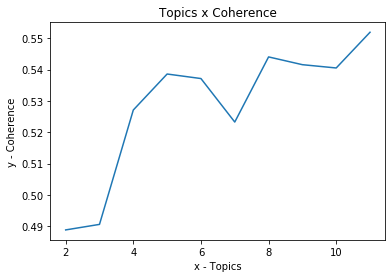

In [45]:
import matplotlib.pyplot as plt 

x = model_results['Topics']
y = model_results['Coherence']

plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - Topics') 
# naming the y axis 
plt.ylabel('y - Coherence') 
  
# giving a title to my graph 
plt.title('Topics x Coherence') 
  
# function to show the plot 
plt.show() 

# Validação dos topicos


In [46]:
warnings.simplefilter('ignore')

np.random.seed(2018)
lda_model = gensim.models.LdaMulticore(corpus, num_topics=12, id2word=dictionary)


In [47]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.014*"bolsonaro" + 0.009*"governo" + 0.009*"coronavirus" + 0.006*"isolamento" + 0.006*"brasil" + 0.006*"covid" + 0.006*"teich" + 0.005*"presidente" + 0.005*"mortes" + 0.004*"live"
Topic: 1 
Words: 0.026*"coronavirus" + 0.014*"brasil" + 0.010*"pandemia" + 0.010*"covid" + 0.006*"mortes" + 0.005*"pessoas" + 0.005*"bolsonaro" + 0.005*"morre" + 0.004*"isolamento" + 0.004*"leia"
Topic: 2 
Words: 0.012*"coronavirus" + 0.011*"bolsonaro" + 0.006*"ministro" + 0.005*"isolamento" + 0.005*"video" + 0.005*"social" + 0.004*"casa" + 0.004*"oassunto" + 0.004*"enem" + 0.004*"distanciamento"
Topic: 3 
Words: 0.007*"covid" + 0.006*"presidente" + 0.006*"semana" + 0.006*"pessoa" + 0.006*"teich" + 0.005*"pacientes" + 0.005*"coronavirus" + 0.004*"rodizio" + 0.004*"cloroquina" + 0.004*"brasil"
Topic: 4 
Words: 0.018*"coronavirus" + 0.010*"covid" + 0.009*"isolamento" + 0.008*"bolsonaro" + 0.007*"mortes" + 0.006*"social" + 0.006*"pandemia" + 0.005*"lockdown" + 0.005*"brasil" + 0.004*"casos"
Top

In [48]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5457993035212819


In [49]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.062688  0.141030       1        1  10.874410
11     0.059981 -0.055706       2        1   8.783765
0     -0.067877  0.011928       3        1   8.757741
5      0.069045  0.025528       4        1   8.660431
6      0.075271 -0.009729       5        1   8.632855
10    -0.059786 -0.053211       6        1   8.620026
9     -0.114261  0.054848       7        1   8.464157
4      0.024190 -0.005198       8        1   8.175770
2     -0.075853  0.030031       9        1   7.798424
7      0.024697  0.012082      10        1   7.556855
3     -0.021331 -0.067167      11        1   7.085917
8      0.023236 -0.084436      12        1   6.589647, topic_info=           Term       Freq      Total Category  logprob  loglift
1         covid  55.000000  55.000000  Default  30.0000  30.0000
334       teich  12.000000  12.000000  Default  29.0000  29.0000
628       reais   6.000000   6.000000  Default  28.0000  28.0000
218     auxilio  15.000000  15.000000  Default  27.0000  27.0000
194       horas  10.000000  10.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
4     pacientes   1.893129  13.122837  Topic12  -5.5391   0.7835
186    pandemia   1.893180  42.310299  Topic12  -5.5391  -0.3871
66        filho   1.279387   6.660691  Topic12  -5.9309   1.0698
1088     leitos   1.279308   7.325899  Topic12  -5.9310   0.9746
28        cinco   1.279296   5.282154  Topic12  -5.9310   1.3016

[844 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
400       4  0.305674      aberto
400       8  0.305674      aberto
400      11  0.305674      aberto
674      11  0.393558    abertura
674      12  0.393558    abertura
...     ...       ...         ...
1478     12  0.779972     yxrgumv
2137      1  0.722274      zbaaww
3025     10  0.758937        zera
3502      8  0.751334  zfijcgfflr
914       2  0.742483       zumbi

[1629 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 12, 1, 6, 7, 11, 10, 5, 3, 8, 4, 9])

## Primeiro modelo com 5 topicos

In [50]:
warnings.simplefilter('ignore')

np.random.seed(2018)
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary)

In [51]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"bolsonaro" + 0.010*"covid" + 0.008*"coronavirus" + 0.007*"governo" + 0.007*"saude" + 0.007*"isolamento" + 0.006*"pandemia" + 0.005*"presidente" + 0.004*"video" + 0.004*"mortes"
Topic: 1 
Words: 0.019*"coronavirus" + 0.011*"brasil" + 0.008*"pandemia" + 0.008*"covid" + 0.007*"mortes" + 0.006*"bolsonaro" + 0.005*"saude" + 0.004*"morre" + 0.004*"isolamento" + 0.004*"ministerio"
Topic: 2 
Words: 0.012*"bolsonaro" + 0.009*"coronavirus" + 0.006*"video" + 0.004*"ministro" + 0.004*"pandemia" + 0.003*"policia" + 0.003*"isolamento" + 0.003*"brasil" + 0.003*"saude" + 0.003*"presidente"
Topic: 3 
Words: 0.010*"coronavirus" + 0.006*"covid" + 0.006*"pacientes" + 0.005*"presidente" + 0.004*"brasil" + 0.004*"auxilio" + 0.004*"pandemia" + 0.004*"teich" + 0.003*"semana" + 0.003*"casos"
Topic: 4 
Words: 0.014*"coronavirus" + 0.011*"covid" + 0.011*"bolsonaro" + 0.007*"pandemia" + 0.006*"governo" + 0.006*"mortes" + 0.004*"milhoes" + 0.003*"casos" + 0.003*"isolamento" + 0.003*"brasil"

In [52]:

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5385785387754423


In [53]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.062966  0.074688       1        1  22.884224
0     -0.051439 -0.021757       2        1  22.446737
4      0.012496  0.044638       3        1  19.773691
3      0.064746 -0.097977       4        1  18.691978
2     -0.088769  0.000407       5        1  16.203373, topic_info=           Term       Freq      Total Category  logprob  loglift
88    bolsonaro  57.000000  57.000000  Default  30.0000  30.0000
36      governo  26.000000  26.000000  Default  29.0000  29.0000
453  presidente  19.000000  19.000000  Default  28.0000  28.0000
4     pacientes  13.000000  13.000000  Default  27.0000  27.0000
211       antes  10.000000  10.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
218     auxilio   2.964785  15.952538   Topic5  -5.9902   0.1371
123       saude   3.459850  29.762211   Topic5  -5.8358  -0.3321
222      brasil   3.467112  36.633858   Topic5  -5.8337  -0.5377
114     reuniao   2.629523  13.414246   Topic5  -6.1102   0.1904
496       paulo   2.629547  13.972934   Topic5  -6.1102   0.1496

[353 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
400       3  0.302126       aberto
400       4  0.604251       aberto
1728      3  0.497687      abracar
1621      2  0.982425    acontecer
1622      2  0.982273        adiar
...     ...       ...          ...
851       4  0.513882        volta
851       5  0.256941        volta
1015      4  0.504579  voluntarios
2509      4  0.504570        wuhan
2604      5  0.520555         zeca

[572 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

In [55]:
model_results

{'Topics': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'Coherence': [0.48887641939422527,
  0.4906389981091545,
  0.5271019369998189,
  0.5385785387754423,
  0.5371334352480112,
  0.5232679591610567,
  0.5440305789167335,
  0.5415536936828328,
  0.5405053891052763,
  0.5518959812658443]}